In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Initialize the x- and y-arrays that we will use to plot
x_axis = []
mean = []
variance = []
skew_list = []
kurt_list = []

# generate gaussian pdf of x
#mu = 2.0
#variance = 2.0
#sigma = math.sqrt(variance)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#plot(x, stats.norm.pdf(x, mu, sigma))
#show()

In [3]:
# proposal function q(x'|x)
def q(x):
    # draw from a multivariate gaussian with mean [0,0] and covariance matrix I
    # Add the randomly drawn number to x and return the sum
    mu = np.array([0.0, 0.0])
    sigma = np.matrix([ [1.0,0.0], [0.0,1.0] ])
    q = stats.multivariate_normal.rvs(mean =mu, cov=sigma)
    return x + q

Part (a)

In [4]:
# density function f(x)
# takes a vector x = (x1, x2) as input
def f(x):
    mu = np.array([0.0, 0.0])
    sigma = np.matrix([ [2.0,1.2], [1.2,2.0] ])
    return stats.multivariate_normal.pdf(x, mean=mu, cov=sigma)
# returns value of the multivariate gaussian associated with the given x

In [5]:
# Array of x-values, initialized with the zero vector [0,0]
xs = [[0.0,0.0]]
for i in range(10000):
    x = xs[-1]
    x_new = q(x)
    accept_ratio = f(x_new)/f(x)
    if rand() < accept_ratio:
        xs.append(x_new)
    else:
        xs.append(x)

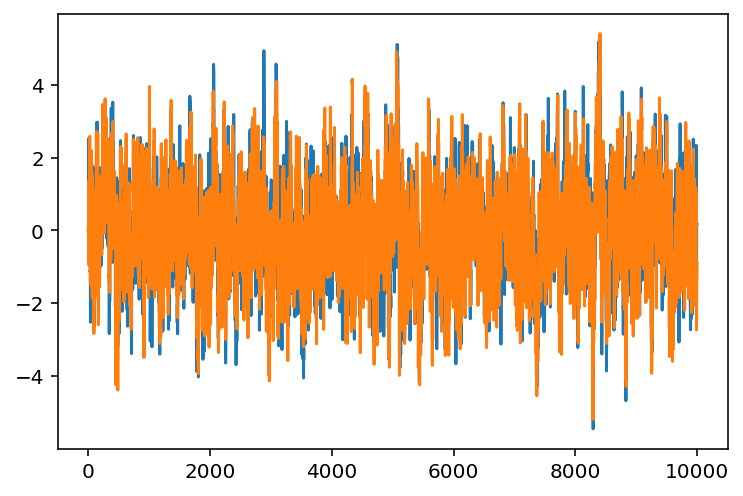

In [6]:
plot(xs)

AttributeError: 'Rectangle' object has no property 'normed'

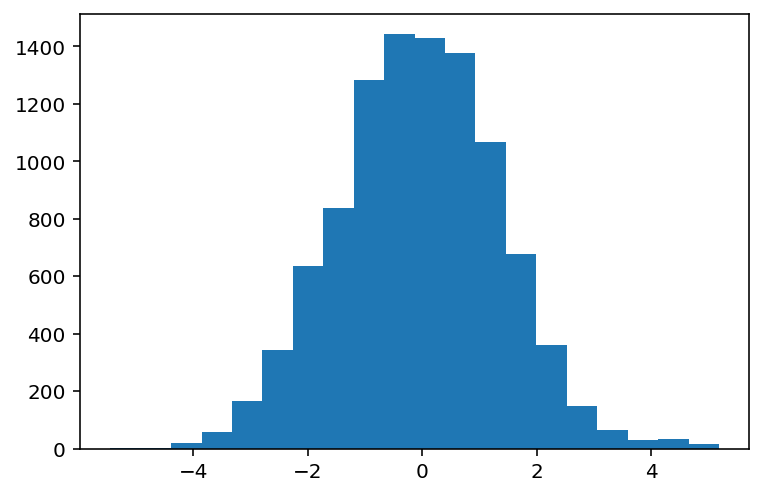

In [7]:
# Extract x- and y-coordinates from the array of vectors
x_axis = []
y_axis = []
for i in xs:
    x_axis.append(i[0])
    y_axis.append(i[1])

# Generate 1-dimensional histograms
hist(x_axis, normed=True, bins=20)
hist(y_axis, normed=True, bins=20)

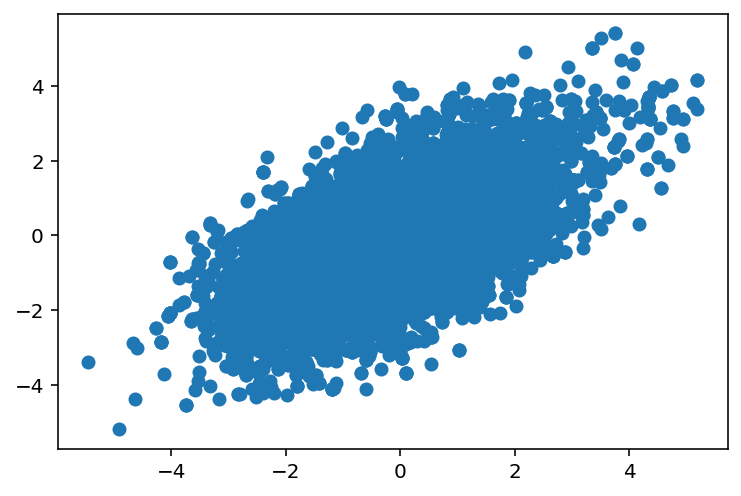

In [8]:
# Generate Scatter plot
scatter(x_axis, y_axis)

show()

AttributeError: 'Rectangle' object has no property 'normed'

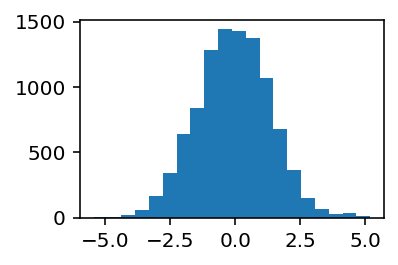

In [10]:
# histogram of x values
subplot(221)
hist(x_axis, normed=True, bins=20)

#Scatter plot
subplot(223)
scatter(x_axis, y_axis)

# histogram of y values
subplot(224)
hist(y_axis, normed=True, bins=20)

show()